In [1]:
#### importing python libraries ###
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
### loading dataset ####

Comcast_comp=pd.read_csv("C://Users//sumas//Documents//Data science//Python//Project//Comcast complaints//Comcast_telecom_complaints_data.csv")

In [3]:
Comcast_comp.shape

(2224, 11)

In [5]:
Comcast_comp.columns

Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone'],
      dtype='object')

In [6]:
Comcast_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [7]:
Comcast_comp.describe()

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


In [10]:
Comcast_comp.head(5)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Data and time
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22-Apr-15 3:53:50 PM
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,04-Aug-15 10:22:56 AM
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18-Apr-15 9:55:47 AM
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,05-Jul-15 11:59:35 AM
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,26-May-15 1:25:26 PM


In [9]:
# Add Date Month year with Time and save it into Date and time
Comcast_comp["Data and time"]=Comcast_comp["Date_month_year"]+" "+Comcast_comp["Time"]

In [15]:
#Convert Date, Date_month_year,Data and time to Datetime Format

Comcast_comp["Date"]=pd.to_datetime(Comcast_comp["Date"])
Comcast_comp["Date_month_year"]=pd.to_datetime(Comcast_comp["Date_month_year"])


In [16]:
Comcast_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   datetime64[ns]
 3   Date_month_year              2224 non-null   datetime64[ns]
 4   Time                         2224 non-null   object        
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   int64         
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
 11  Data and time                2224 non-null 

In [18]:
Comcast_comp=Comcast_comp.set_index(Comcast_comp["Data and time"])

In [19]:
Comcast_comp.head(5)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Data and time
Data and time,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56
2015-04-18 09:55:47,242732,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26


In [26]:
#Lets extract month from date_month_year column
Comcast_comp["month"]=Comcast_comp.Date_month_year.dt.month

In [27]:
Comcast_comp['month']=Comcast_comp['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','March','April','May','June','July','Aug','Sep','Oct','Nov','Dec'])

In [28]:
Comcast_comp['month']

Data and time
2015-04-22 15:53:50    April
2015-08-04 10:22:56      Aug
2015-04-18 09:55:47    April
2015-07-05 11:59:35     July
2015-05-26 13:25:26      May
                       ...  
2015-02-04 09:13:18      Feb
2015-02-06 13:24:39      Feb
2015-09-06 17:28:41      Sep
2015-06-23 23:13:30     June
2015-06-24 22:28:33     June
Name: month, Length: 2224, dtype: object

<AxesSubplot:xlabel='Data and time', ylabel='Number of Complaints'>

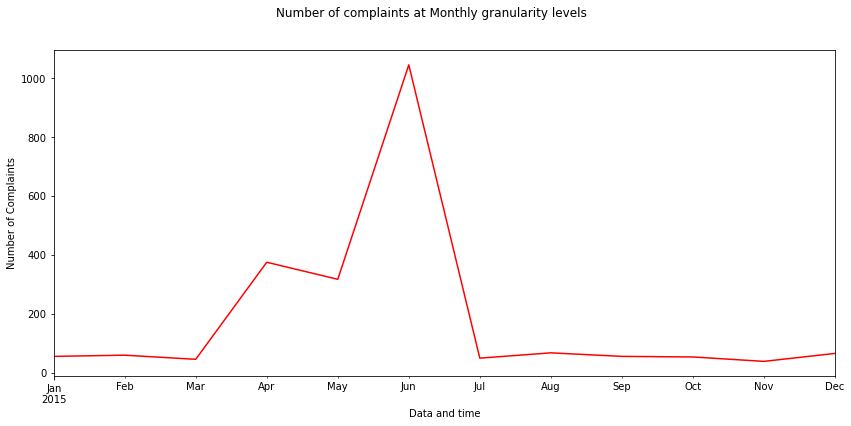

In [29]:
# Provide the trend chart for the number of complaints at monthly granularity levels.
#Increase Graph Size
plt.figure(figsize=(14,6))
plt.suptitle('Number of complaints at Monthly granularity levels')
plt.ylabel('Number of Complaints')
Comcast_comp['month'].groupby(pd.Grouper(freq="M")).size().plot(color='red')

<AxesSubplot:>

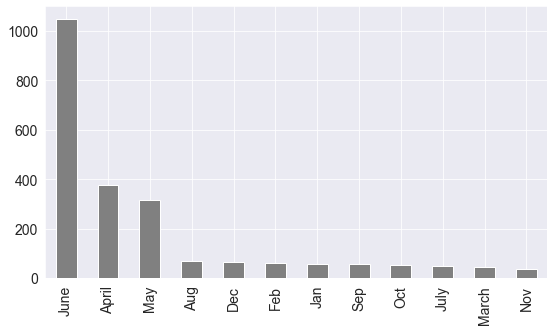

In [43]:
#### Monthly Granularity ####
Comcast_comp['month'].value_counts().plot(kind='bar',color='grey')

<AxesSubplot:xlabel='Date', ylabel='Number of Complaints'>

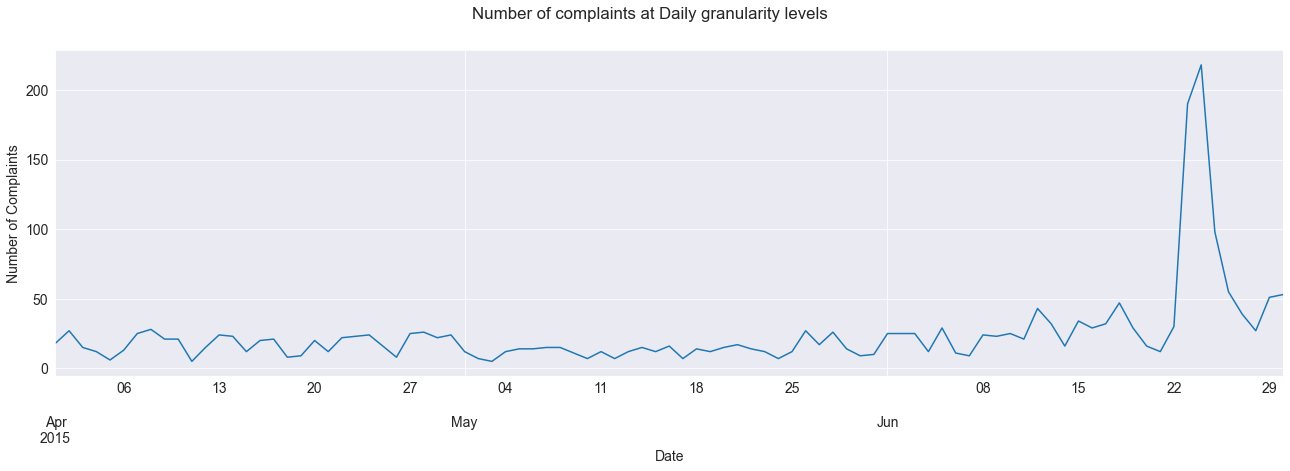

In [39]:
# Provide the trend chart for the number of complaints at daily granularity levels.
plt.figure(figsize=(14,6))
plt.suptitle('Number of complaints at Daily granularity levels')
plt.ylabel('Number of Complaints')
Comcast_comp['Customer Complaint'].groupby(Comcast_comp.Date).count().plot(kind='line',figsize=(22,6))

<AxesSubplot:xlabel='Date'>

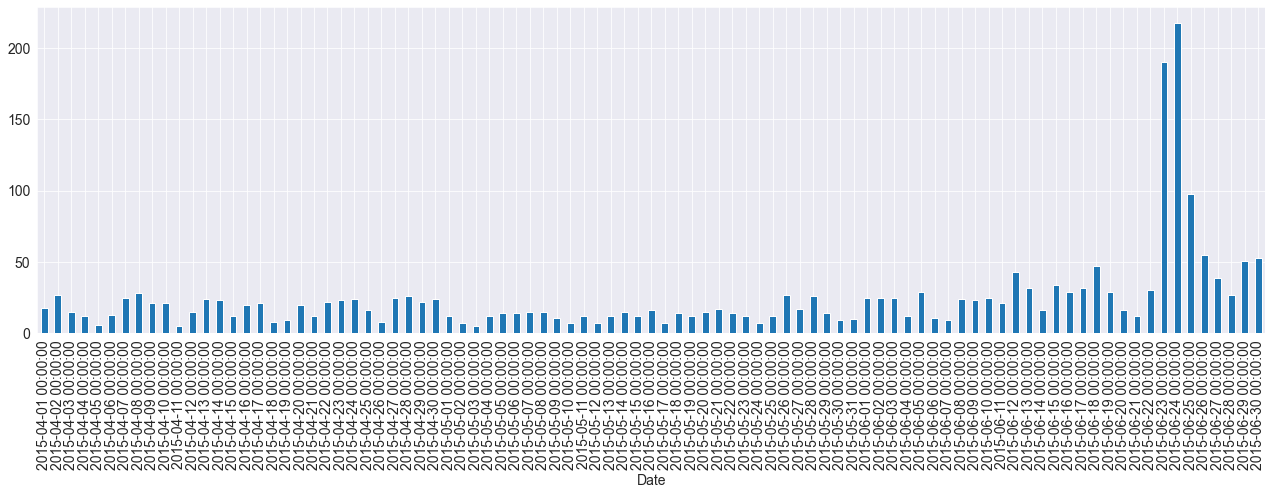

In [42]:
#### Daily Granularity ####
Comcast_comp['Customer Complaint'].groupby(Comcast_comp.Date).count().plot(kind='bar',figsize=(22,6))

**Highest complaints (more than 200) received on Date 24.06.2015**

In [47]:
# To get the frequency of complaint types first we have to see all complaint types and check for duplicate, case sensentive
# Incomplete data so that we can make analytics better
complaint_type = Comcast_comp["Customer Complaint"].value_counts()
complaint_type

Comcast                                                   83
Comcast Internet                                          18
Comcast Data Cap                                          17
comcast                                                   13
Comcast Data Caps                                         11
                                                          ..
Customer Service & Billing                                 1
Throttled connection at peak time                          1
Concern about Comcast Internet Modem Billing Practices     1
Comcast in violation of merger terms                       1
COMCAST SERVICE COMPLAINT                                  1
Name: Customer Complaint, Length: 1841, dtype: int64

In [50]:
# Better to convert all data into uper case or sentence case so duplicate value will shorted
complaint_type=Comcast_comp["Customer Complaint"].str.upper().value_counts()
complaint_type.head(25)

COMCAST                      102
COMCAST DATA CAP              30
COMCAST INTERNET              29
COMCAST DATA CAPS             21
COMCAST BILLING               18
INTERNET SPEED                15
COMCAST SERVICE               15
DATA CAPS                     13
UNFAIR BILLING PRACTICES      13
DATA CAP                      12
COMCAST COMPLAINT             11
COMCAST/XFINITY               11
COMCAST INTERNET SERVICE      10
BILLING                        9
BILLING ISSUES                 8
COMCAST CABLE                  5
SLOW INTERNET                  5
COMPLAINT AGAINST COMCAST      5
COMCAST BILLING PRACTICES      5
SERVICE ISSUES                 5
INTERNET SERVICE               5
COMCAST ISSUES                 5
INTERNET                       5
COMCAST BILLING COMPLAINT      5
NO INTERNET SERVICE            4
Name: Customer Complaint, dtype: int64

We can show clearly in this table that COMCAST, COMCAST DATA CAP
#COMCAST INTERNET are the Highest top 3 complaint types

In [51]:
##Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed##
## using if else loop ###
Comcast_comp["new_status"]=["Open" if (Status=="Open" or Status=="Pending") else "Closed" for Status in Comcast_comp["Status"]]

In [52]:
Comcast_comp

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Data and time,month,new_status
Data and time,,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,April,Closed
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,Aug,Closed
2015-04-18 09:55:47,242732,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,April,Closed
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,July,Open
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,May,Closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-02-04 09:13:18,213550,Service Availability,2015-04-02,2015-02-04,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,2015-02-04 09:13:18,Feb,Closed
2015-02-06 13:24:39,318775,Comcast Monthly Billing for Returned Modem,2015-06-02,2015-02-06,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,2015-02-06 13:24:39,Feb,Closed
2015-09-06 17:28:41,331188,complaint about comcast,2015-06-09,2015-09-06,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,2015-09-06 17:28:41,Sep,Closed


In [54]:
state_complaints=Comcast_comp.groupby(["State","new_status"]).size().unstack().fillna(0)
state_complaints

new_status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


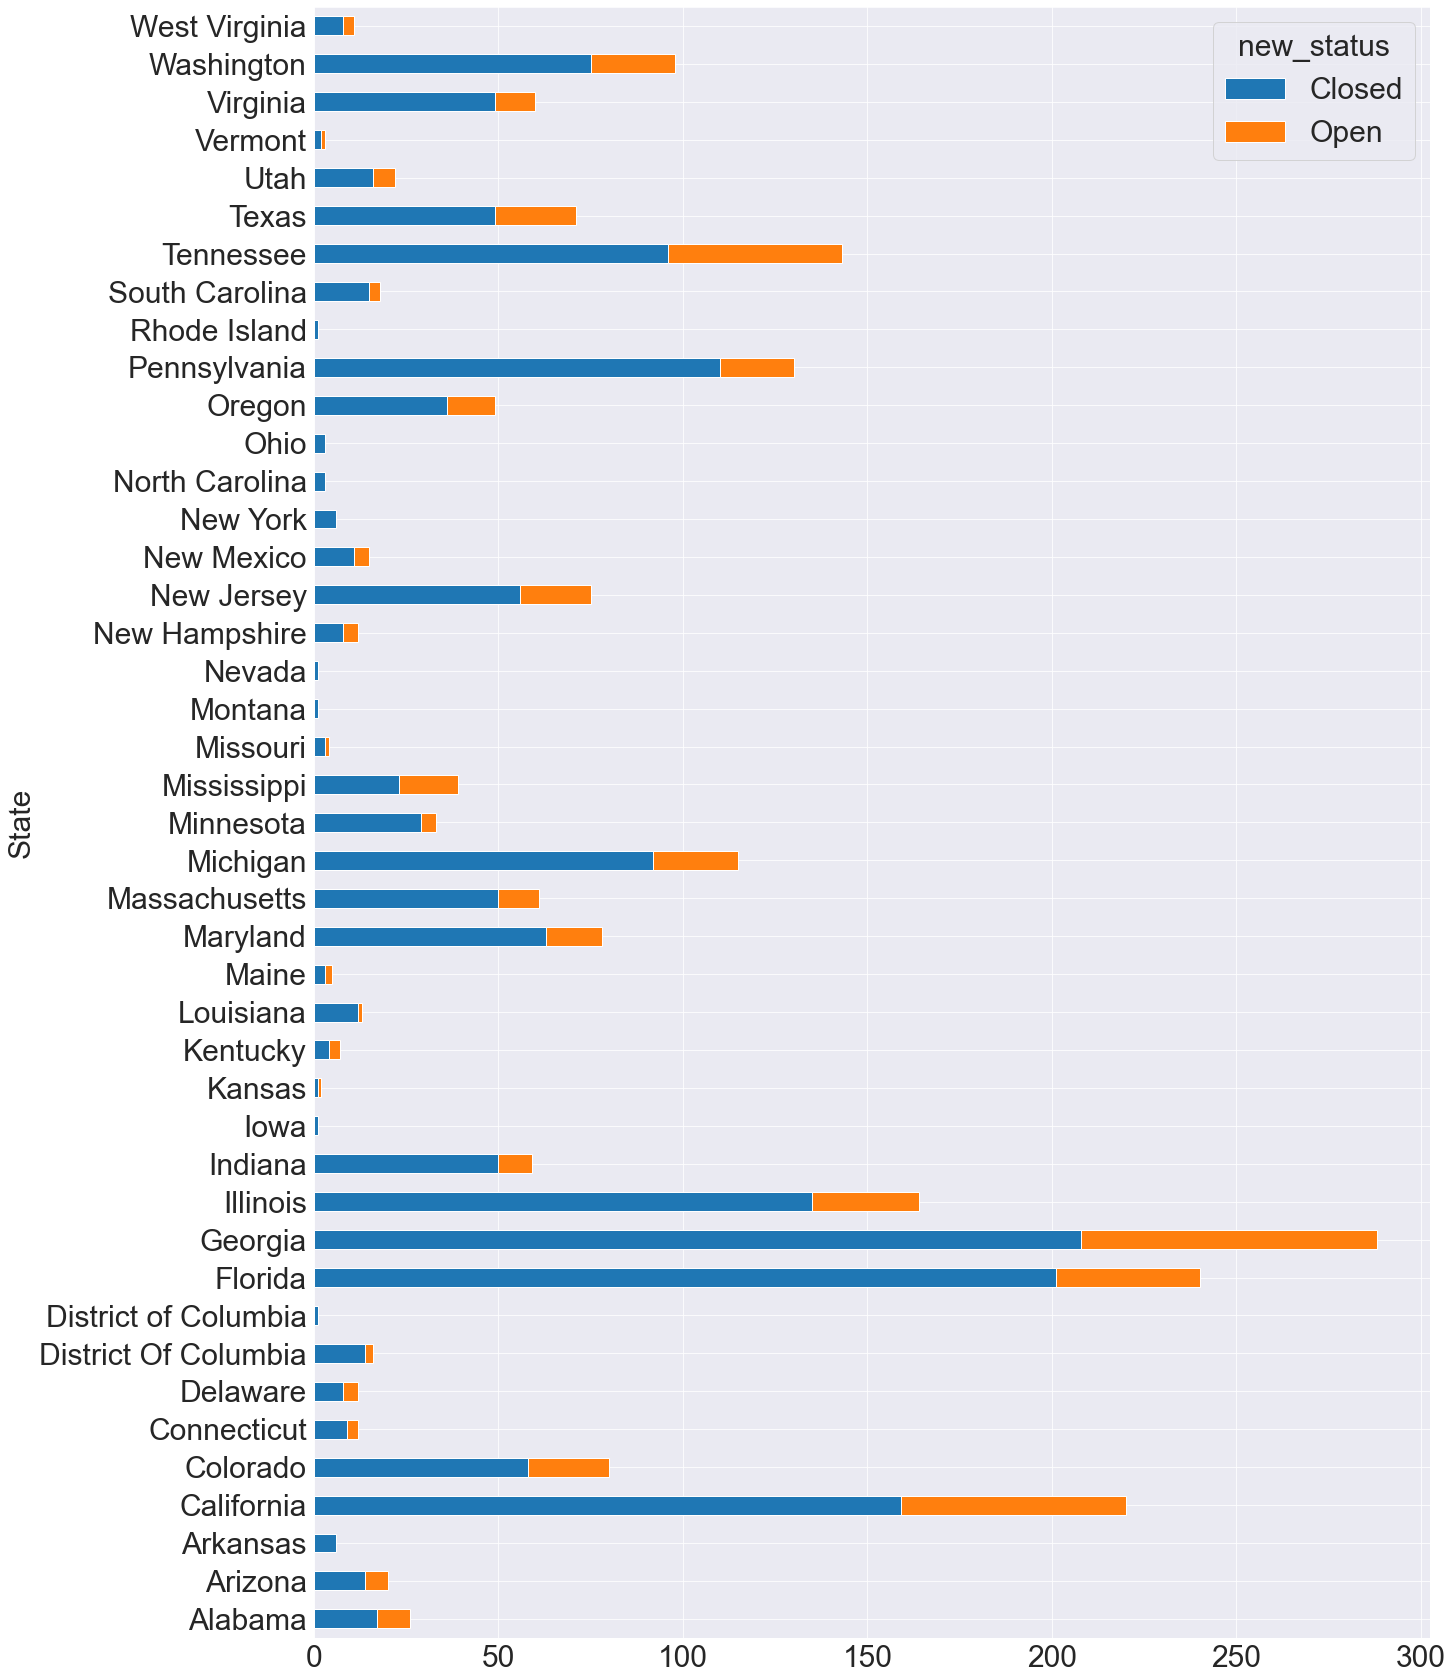

In [56]:
state_complaints.plot(kind="barh",figsize=(20,30),stacked=True)
plt.rcParams.update({"font.size":30})

Georgia has maximum number of complaints

In [62]:
statewise_max=Comcast_comp[['Ticket #', 'State']].groupby('State').count().sort_values(by='Ticket #',ascending=False)
statewise_max.head()

,Ticket #
State,
Georgia,288
Florida,240
California,220
Illinois,164
Tennessee,143


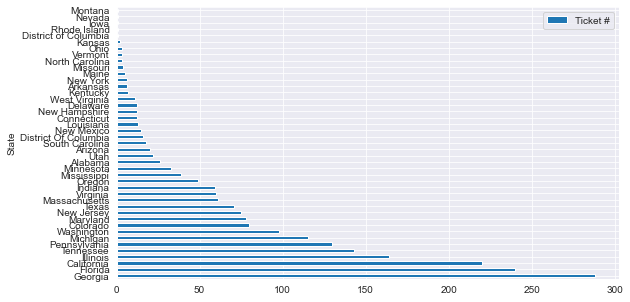

In [64]:
statewise_max.plot(kind='barh')
plt.rcParams.update({"font.size":5})

Georgia state has received maximum customer complaints we have to give special attention to that state Georgia,Florida and california are three states from where maximum complaints were received

In [67]:
##Which state has the highest percentage of unresolved complaints
unresolved_complaints = Comcast_comp[Comcast_comp['new_status']=='Open']

In [83]:
unresolved_complaints_state=unresolved_complaints.State.value_counts()
unresolved_complaints_state

Georgia                 80
California              61
Tennessee               47
Florida                 39
Illinois                29
Michigan                23
Washington              23
Texas                   22
Colorado                22
Pennsylvania            20
New Jersey              19
Mississippi             16
Maryland                15
Oregon                  13
Virginia                11
Massachusetts           11
Indiana                  9
Alabama                  9
Utah                     6
Arizona                  6
Delaware                 4
New Mexico               4
Minnesota                4
New Hampshire            4
South Carolina           3
Connecticut              3
West Virginia            3
Kentucky                 3
District Of Columbia     2
Maine                    2
Louisiana                1
Missouri                 1
Kansas                   1
Vermont                  1
Name: State, dtype: int64

<AxesSubplot:>

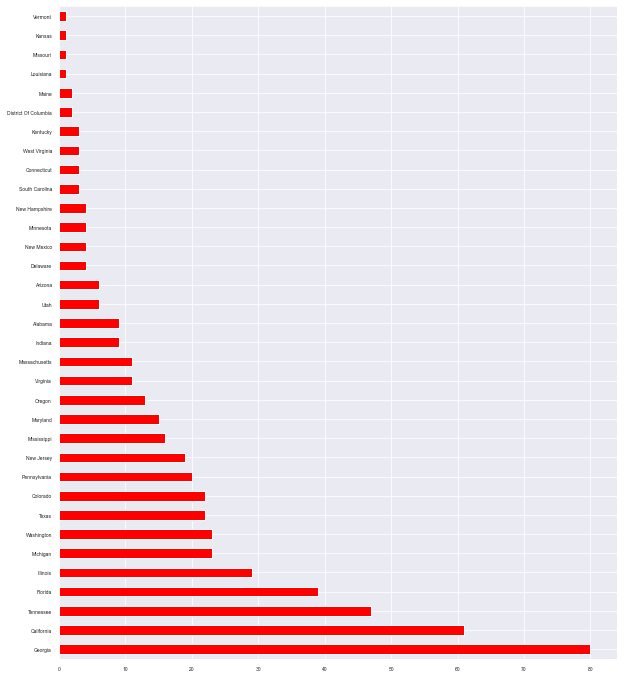

In [81]:
unresolved_complaints.State.value_counts().plot(kind='barh',figsize=(10,12),color="red")


Georgia state has  maximum unresolved customer complaints

In [87]:
Comcast_comp.new_status.value_counts()

Closed    1707
Open       517
Name: new_status, dtype: int64

In [86]:
###Which state has the highest percentage of unresolved complaints
percentage_of_unresolved_complaints=(unresolved_complaints_state/517*100)
percentage_of_unresolved_complaints

Georgia                 15.473888
California              11.798839
Tennessee                9.090909
Florida                  7.543520
Illinois                 5.609284
Michigan                 4.448743
Washington               4.448743
Texas                    4.255319
Colorado                 4.255319
Pennsylvania             3.868472
New Jersey               3.675048
Mississippi              3.094778
Maryland                 2.901354
Oregon                   2.514507
Virginia                 2.127660
Massachusetts            2.127660
Indiana                  1.740812
Alabama                  1.740812
Utah                     1.160542
Arizona                  1.160542
Delaware                 0.773694
New Mexico               0.773694
Minnesota                0.773694
New Hampshire            0.773694
South Carolina           0.580271
Connecticut              0.580271
West Virginia            0.580271
Kentucky                 0.580271
District Of Columbia     0.386847
Maine         

Georgia state has highest unresolved customer complaints

In [77]:
###Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.
Comcast_comp['Received Via'].unique()

array(['Customer Care Call', 'Internet'], dtype=object)

In [88]:
compl=Comcast_comp.groupby(['Received Via','new_status'])['Received Via'].count().unstack()
compl

new_status,Closed,Open
Received Via,,
Customer Care Call,864,255
Internet,843,262


In [92]:
totcompl=len(Comcast_comp)
totcompl

2224

In [93]:
for x in compl.values:
    l=(x/totcompl*100)
    print(l)

[38.84892086 11.46582734]
[37.90467626 11.78057554]


percentage of complaints resolved till date received through customer car call is 39%
percentage of complaints resolved till date received through Interent is 38%

<AxesSubplot:title={'center':'Complaints Status through the Internet & Customer Care Calls\n'}, ylabel='new_status'>

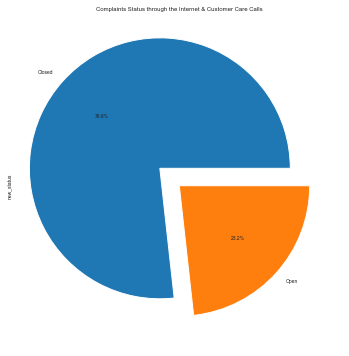

In [89]:
# Used autopct='%1.1f%%'  to show percentage under the pie chart
myexplode = [0.2, 0]
plt.title('Complaints Status through the Internet & Customer Care Calls\n')
Comcast_comp.new_status.value_counts().plot(kind='pie',explode = myexplode,autopct='%1.1f%%',
                        figsize = (10,6))

## Inferences and Conclusion

We have seen that total complaint resolved rate is **76.7%** to improve this we have to lookout the state of **Georgia,Florida and california** from where maximum complaints received and the month of **June** as maximum complaints received in this month. We should look out the reason behind this.